# DATA PREPROCESSING

### Feature Scaling:
1. MinMaxScaler for scaling(Noramlization) the features between 0 and 1


In [1]:
import pandas as pd
import numpy as np

dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values

### Importing Libraries:
1. Pandas for data manipulation
2. Numpy for numerical operations

In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

- Each row in x_train contains previous consecutive 60 days "open" prince.
- Each row in y_train contains corresponding 61st day "open" price.
- Converting into 3-D (sample, timestamp, feature)

In [5]:
x_train = []
y_train = []

for i in range(60, 1257):
    x_train.append(training_set_scaled[i-60:i,0])  
    y_train.append(training_set_scaled[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# LSTM Model:
1. LSTM model with 50 units and 4 hidden layers.
2. Dropout layer with 0.2 for regularization.
3. Adam optimizer with learning rate 0.001.
4. Mean Squared Error as loss function.

### Importing Libraries:

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input

- Intializing the model with Sequential.
- Adding LSTM layer with 50 units and 4 hidden layers.
- Adding Dropout layer for avoiding overfitting.
- Adding Dense layer with 1 unit(predicting onw output).

In [7]:
regressor = Sequential()

regressor.add(Input(shape=(x_train.shape[1],1)))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(1))

- Compile the model with Adam optimizer and Mean Squared Error as loss function. 
- Fit the model with 100 epochs and batch size 32.

In [8]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(x_train, y_train,batch_size=32 , epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 0.1014
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0067
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0057
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0051
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0058
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0044
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0040
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0046
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0059
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0049
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0041
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - l

# Prediction:

### Importing the test data.

In [9]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

- Concatenating the dataset_train and dataset_test.
- len(dataset_total) - len(dataset_test) - 60 is the starting index of test data.
- Convert 1-D into 2-D array.

In [10]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)

- Feature scaling on the test data.
- Prepare the test data with 60 previous days "open" price.
- Reshape the test data into 3-D array.

In [11]:

inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i- 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Predict and inverse transforming the test data using the trained model.

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


### Visualizing the Prediction:

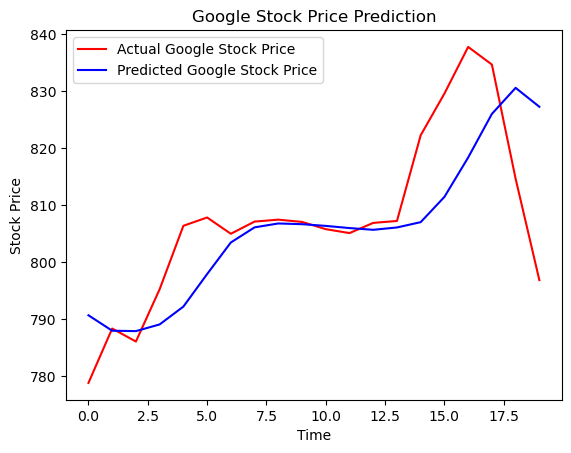

In [13]:
import matplotlib.pyplot as plt

plt.plot(real_stock_price, color='red', label='Actual Google Stock Price')

plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')

plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()